<a href="https://colab.research.google.com/github/cabamarcos/P1-RRNN/blob/main/P1_RRNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

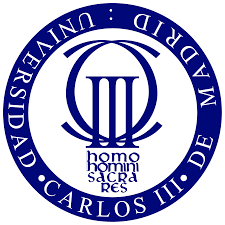

# PRÁCTICA 1: REDES DE NEURONAS
Autores: Pablo Hidalgo Delgado y Marcos Caballero Cortés   

NIAs: 100451225 y 100451247


# PREGUNTAS PROFE


1. Exactamente, el error de entrenamiento y validacion que es?? se nos pide guardar la evolucion. Vale para el error de entrenamiento ya que lo calculamos al entrenar el adaline dentro del propio modelo pero para el de validacion?? lo que hacemos es predecir con X_validation y luego calcular el error con y_validation --> solo nos sale un valor, no hay evolucion!
Sin embargo, en los de Keras, si hay evolución del error de validacion

RESPUESTA: entrenamiento y validacion --> evolucion --> pasar datos de validacion

2. GUARDAR TRAIN Y TEST Y VALIDACION EN FICHEROS

3. El error de test, con los datos normalizados o desnormalizados??? si es con desnormalizados, el error de entrenamiento y de validación no va a estar en la misma escala.

RESPUESTA: dejarlo como esta

5. Gráfica de las predicciones --> quiere algo asi?
RESPUESTA: SI

6. Una tabla que contenga los resultados obtenidos para todos los experimentos
realizados (hiperparámetros utilizados, errores de entrenamiento, validación y
test). --> EL ERROR DE TEST SOLO SERIA PARA EL MEJOR MODELO NO? PARA EL QUE ESCOGEMOS

RESPUESTA: error de test para todos los modelos!!

EVOLUCION PARA LOS MAS SIGNIFICATIVOS / MEJOR

RESULTADOS PARA TODOS ESCOGIENDO EL MENOR ERROR


8. Numero de pruebas--> dice en la memoria que será especificado por el profe en clase, asi estaria bien??



## 1. Introducción
El propósito de esta práctica es abordar un problema real de regresión utilizando dos modelos de redes de neuronas supervisados:

*   El modelo lineal Adaline.
*   El modelo no-lineal Perceptrón Multicapa.

Para ello, se nos dispone de un conjunto de datos relacionados con medidas realizadas en una turbina de gas a lo largo de 4 años. Debemos predecir el rendimiento energético de la turbina, mostrado en el campo TEY, haciendo uso del resto de mediciones de sensores.




## 2. Leer los conjuntos de datos


En primer lugar, importamos todas las librerías que se van a utilizar a lo largo de la práctica

In [1]:
import random
import time

import numpy as np
import pandas as pd

from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error
import seaborn as sns
import matplotlib.pyplot as plt

import tensorflow as tf
from keras.models import Sequential
from keras.layers import Dense
from keras.models import load_model

import pickle
import seaborn as sns
import json

Leemos los conjuntos de datos, correspondientes a las medidas de 1 solo año, y los juntamos en un mismo dataframe de pandas.

In [2]:
archivos_csv = ['gt_2011.csv', 'gt_2012.csv', 'gt_2013.csv', 'gt_2014.csv', 'gt_2015.csv']

datos = pd.DataFrame()

# Concatenamos todos los archivos en un mismo dataframe
for archivo in archivos_csv:
    # Leemos el archivo
    df_temporal = pd.read_csv(archivo)
    # Concatenamos el archivo en el dataframe final
    datos = pd.concat([datos, df_temporal], ignore_index=True)

## 3. Análisis Exploratorio de Datos (EDA)
Antes de empezar con la división en datos de entrenamiento y test, vamos a realizar un pequeño análisis exploratorio de datos (EDA). De esta manera, podremos investigar y resumir las características más importantes de nuestro dataset. Esto nos servirá para comprender mejor los datos y optimizar la obtención de nuestro modelo.


### 3.1 Información básica

In [3]:
datos.info(memory_usage = 'deep')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36733 entries, 0 to 36732
Data columns (total 11 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   AT      36733 non-null  float64
 1   AP      36733 non-null  float64
 2   AH      36733 non-null  float64
 3   AFDP    36733 non-null  float64
 4   GTEP    36733 non-null  float64
 5   TIT     36733 non-null  float64
 6   TAT     36733 non-null  float64
 7   TEY     36733 non-null  float64
 8   CDP     36733 non-null  float64
 9   CO      36733 non-null  float64
 10  NOX     36733 non-null  float64
dtypes: float64(11)
memory usage: 3.1 MB


El conjunto de datos se compone de 36733 instancias y 11 atributos de tipo float64.

También podemos observar que no existen columnas que contengan valores nulos.

### 3.2 Atributos compuestos de valores constantes

A continuación, vamos a analizar si existen columnas constantes en nuestro conjunto de datos. En ese caso, podremos eliminarlas de nuestro dataset ya que no aportan ninguna información a la variable de respuesta y no existe riesgo de information leakage.

In [4]:
# Eliminamos las columnas con solo un valor único
columnas_constantes = []
for col in datos.columns:
    if datos[col].nunique() == 1:
        print(col)
        columnas_constantes.append(col)
if len(columnas_constantes) == 0:
  print("No existen atributos con valores constantes")

No existen atributos con valores constantes


## 4. División de datos en train, validation y test.
Una vez explorado y analizado nuestro conjunto de datos, dividimos el dataset en conjuntos de entrenamiento (train), prueba (test) y validación (validation). Para ello, utilizamos la función train_test_split de la librería sklearn. Dividimos los datos en un 70% para train, un 15% para test, y un 15% para validation tal y como se nos pide en el enunciado de la práctica.

Antes de realizar la división, debemos separar la variable de respuesta del resto del conjunto de datos.

In [5]:
X = datos.drop("TEY", axis = 1)
y = datos["TEY"]
y

0        134.67
1        134.67
2        135.10
3        135.03
4        134.67
          ...  
36728    109.08
36729    108.79
36730    107.81
36731    131.41
36732    125.41
Name: TEY, Length: 36733, dtype: float64

Dividimos el conjunto de datos. Lo hacemos especificando el parámetro random_state a 42 para que se aleatorizen los datos y el resultado sea reproducible.


In [6]:
# Dividir los datos originales en conjuntos de entrenamiento (70%) y test (30%)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Dividir el conjunto de prueba en conjuntos de validación (15%) y test (15%)
X_validation, X_test, y_validation, y_test = train_test_split(X_test, y_test, test_size=0.5, random_state=42)

# Guardamos los conjuntos de datos en archivos CSV
X_train.to_csv('X_train.csv', index=False)
y_train.to_csv('y_train.csv', index=False)
X_validation.to_csv('X_validation.csv', index=False)
y_validation.to_csv('y_validation.csv', index=False)
X_test.to_csv('X_test.csv', index=False)
y_test.to_csv('y_test.csv', index=False)

## 5. Preproceso
Previamente a entrenar los modelos, debemos realizar una transformación de los datos para que puedan ser interpretados por el algoritmo de manera eficiente. Las transformaciones de datos que realizamos son las siguientes:

### 5.1 Normalización
Para que no se produzca information leakage y no dar información al cinjunto de test, normalizamos todos los datos con el mínimo y máximo obtenido del conjunto de entrenamiento.

In [7]:
for columna in X_train:
  # Obtenemos el minimo y el maximo de cada columna del conjunto de train
  min = X_train[columna].min()
  max = X_train[columna].max()
  # Conjunto de entrenamiento
  X_train[columna] = (X_train[columna] - min)/(max - min)
  # Conjunto de validación
  X_validation[columna] = (X_validation[columna] - min)/(max - min)
  # Conjunto de test
  X_test[columna] = (X_test[columna] - min)/(max - min)

y_min = y_train.min()
y_max = y_train.max()
# Conjunto de entrenamiento
y_train = (y_train - y_min)/(y_max - y_min)
# Conjunto de validación
y_validation = (y_validation - y_min)/(y_max - y_min)
# Conjunto de test
y_test = (y_test - y_min)/(y_max - y_min)


y_test

33895    0.606320
25272    0.664233
15758    0.427924
26083    0.362961
23653    0.447690
           ...   
28341    0.391540
28266    0.365983
11243    0.134962
3787     0.399471
7667     0.445424
Name: TEY, Length: 5510, dtype: float64

### 5.2 Aleatorización
La aleatorización de los datos la hemos realizado al dividir el conjunto de datos en train, test y validation al especificar el parametro shuffle = True

## 6. Modelo lineal Adaline

### 6.1 Adaline implementado con nested loops (ineficiente)

In [8]:
class Adaline_for:
    def __init__(self, learning_rate=0.1, epochs=50, random_seed = 45):
        self.learning_rate = learning_rate
        self.epochs = epochs
        self.weights = None
        self.bias = None
        self.random_seed = random_seed
        self.error_entrenamiento = []
        self.historical_weights = []
        self.error_validation = []

    def fit(self, X, y, X_validation, y_validation):
      # Inicializamos el Adaline
      self.__initialize_Adaline(X)

      X = X.values
      y = y.to_numpy().reshape(-1, 1)
      X_validation = X_validation.values
      y_validation = y_validation.to_numpy().reshape(-1, 1)

      # Para cada época
      for i in range(self.epochs):
          error_filas = []

          # Para cada fila
          for fila in range(X.shape[0]):
              # Calculamos la salida
              salida = np.dot(self.weights, X[fila]) + self.bias
              # Obtenemos el error
              error = y[fila] - salida
              error_filas.append(error ** 2)  # Insertamos el error al cuadrado de cada fila para luego obtener el MSE de entrenamiento
              # Actualizamos los pesos
              self.weights += self.learning_rate * error * X[fila]
              # Actualizamos el umbral
              self.bias += self.learning_rate * error

          # Obtenemos el MSE y lo insertamos en la lista del error de entrenamiento
          self.error_entrenamiento.append(np.mean(error_filas))
          # Obtenemos la salida para los datos de validación
          salida_validation = np.dot(X_validation, self.weights) + self.bias
          # Obtenemos el error de validación (MSE)
          error_validation = mean_squared_error(salida_validation, y_validation)
          self.error_validation.append(error_validation)

    def predict(self, X):
      # Calculamos la salida para cada muestra en X
      predictions = []
      for fila in range(X.shape[0]):
          salida = self.weights.dot(X[fila]) + self.bias
          predictions.append(salida)  # Agrega la salida a la lista de predicciones
      return predictions


    def __initialize_Adaline(self,X):
        np.random.seed(self.random_seed)
        n_samples, n_features = X.shape
        self.weights = np.random.uniform(-1,1,size = n_features)
        self.bias = np.random.uniform(-1,1)

### 6.2 Adaline implementado con matrices (eficiente)



In [17]:
class Adaline:
    def __init__(self, learning_rate=0.1, epochs=100, random_seed = 45):
        self.learning_rate = learning_rate
        self.epochs = epochs
        self.weights = None
        self.umbral = None
        self.random_seed = random_seed
        self.error_entrenamiento = []
        self.error_validation = []

    def __initialize_Adaline(self,X):
        np.random.seed(self.random_seed)
        n_samples, n_features = X.shape
        self.weights = np.random.uniform(-1, 1, size=(n_features, 1))
        self.umbral = np.random.uniform(-1,1)

    def fit(self, X, y, X_validation, y_validation):
        # Inicializamos el Adaline
        self.__initialize_Adaline(X)
        # Convertimos X e y a dos arrays de numpy
        X = X.values
        y = y.to_numpy().reshape(-1, 1)

        X_validation = X_validation.values
        y_validation = y_validation.to_numpy().reshape(-1, 1)

        for i in range(self.epochs):
          # Obtenemos la salida
          salida = np.dot(X, self.weights) + self.umbral

          # Obtenemos los errores
          errores = y - salida

          # Actualizamos el vector de pesos
          new_weights = self.learning_rate * X * errores # Calculamos los nuevos pesos para cada entrada
          media_new_weights = np.mean(new_weights, axis=0) # Calculamos la media de los nuevos pesos
          self.weights += media_new_weights.reshape(-1, 1)

          # Actualizamos el umbral
          self.umbral += self.learning_rate * errores.mean()

          # Obtenemos y guardamos el MSE
          error_entrenamiento = mean_squared_error(salida, y)
          self.error_entrenamiento.append(error_entrenamiento)

          # Obtenemos la salida para los datos de validación
          salida_validation = np.dot(X_validation, self.weights) + self.umbral
          # Obtenemos el error de validación (MSE)
          error_validation = mean_squared_error(salida_validation, y_validation)
          self.error_validation.append(error_validation)

    def predict(self, X):
      # Convertimos X a un array de numpy
      X = X.values
      salida = np.dot(X, self.weights) + self.umbral
      return salida



### 6.3. Elección del mejor modelo
A continuación, debemos elegir los mejores hiperparámetros. Para ello, construimos distintos modelos con diferentes hiperparámetros y lo evaluamos con el conjunto de validación. Escogeremos el modelo con la combinación de hiperparámetros cuyo MSE sea el menor.

(LR=0.5, Épocas=10) --> Tiempo de entrenamiento 0.06 s , MSE validación: [0.8426198277848198, 0.9123696323410864, 1.039798387469154, 1.1377130153881647, 1.301230267461744, 1.4351062497983293, 1.6440595887054958, 1.824154349003319, 2.0907085766184275, 2.330420822468855], MSE entrenamiento: [0.7531999341592132, 0.831711192895161, 0.9229790426997116, 1.0285074593215173, 1.150030513119304, 1.2895405408285912, 1.4493205030634344, 1.6319810522133467, 1.840502911789563, 2.0782852544121275]
(LR=0.5, Épocas=50) --> Tiempo de entrenamiento 0.30 s , MSE validación: [0.8426198277848198, 0.9123696323410864, 1.039798387469154, 1.1377130153881647, 1.301230267461744, 1.4351062497983293, 1.6440595887054958, 1.824154349003319, 2.0907085766184275, 2.330420822468855, 2.6703388833660617, 2.9870946049222935, 3.420751589888245, 3.837153482645511, 4.390849622868088, 4.936164919758274, 5.643822947714446, 6.355906697626228, 7.261263966991064, 8.189043169541794, 9.34848112990753, 10.555161677601985, 12.041356787

<Figure size 640x480 with 0 Axes>

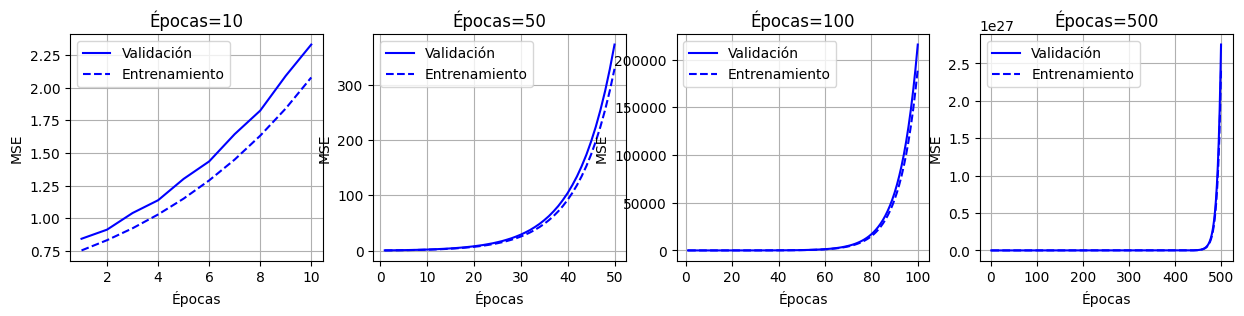

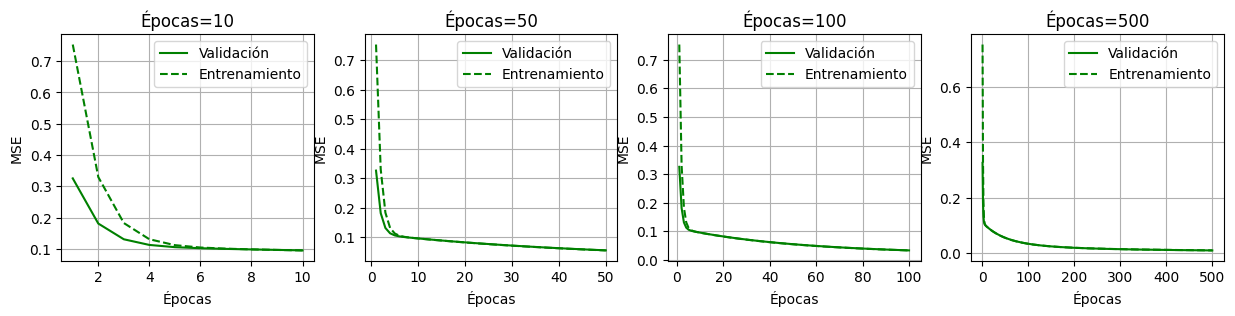

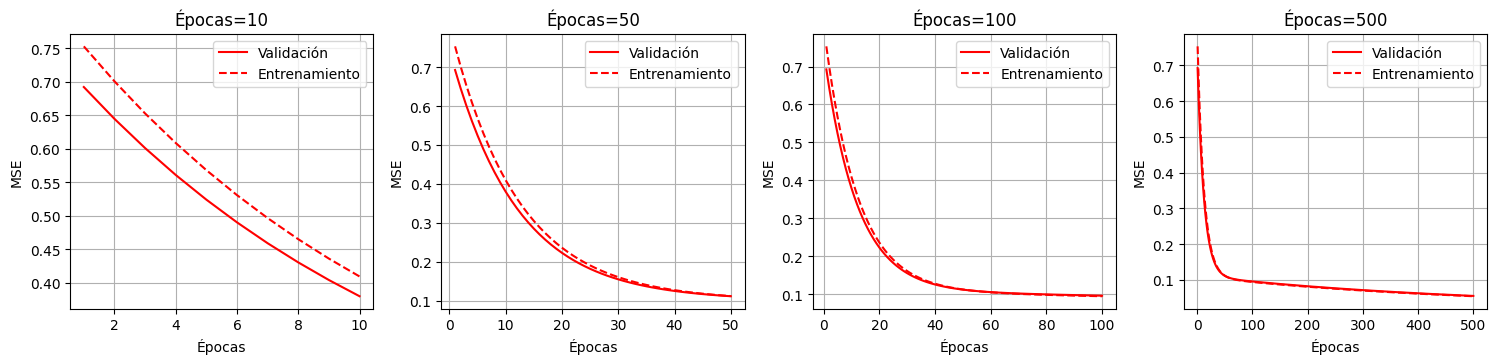

In [21]:
# Lista de tasas de aprendizaje a probar
learning_rates = [0.5, 0.1, 0.01]
# Lista de epochs a probar
epochs_values = [10, 50, 100, 500]

# Lista para almacenar los errores MSE de validación
mse_validation_values = []
mse_train_values = []
tiempo_entrenamiento = []

for lr in learning_rates:
    mse_train_values_lr = []
    mse_lr_values = []  # Almacenamos los errores para cada tasa de aprendizaje
    tiempo_lr_values = []  # Almacenamos los tiempos para cada tasa de aprendizaje

    for epochs in epochs_values:
        # Creamos el modelo
        modelo = Adaline(learning_rate=lr, epochs=epochs)
        # Entrenamos el modelo y obtenemos el tiempo que ha tardado en entrenarse
        start_time = time.time()
        modelo.fit(X_train, y_train, X_validation, y_validation)
        tiempo_total = time.time() - start_time
        tiempo_lr_values.append(tiempo_total) # Guardamos el tiempo

        # Obtenemos el MSE y lo guardamos
        mse_validation = modelo.error_validation
        mse_lr_values.append(mse_validation)
        mse_train = modelo.error_entrenamiento
        mse_train_values_lr.append(mse_train)
        print(f'(LR={lr}, Épocas={epochs}) --> Tiempo de entrenamiento {tiempo_total:.2f} s , MSE validación: {mse_validation}, MSE entrenamiento: {mse_train}')
    print("\n")
    mse_validation_values.append(mse_lr_values)
    mse_train_values.append(mse_train_values_lr)
    tiempo_entrenamiento.append(tiempo_lr_values)

# Define colores para los gráficos
colores = ['b', 'g', 'r']
# Etiquetas para los errores de validación y entrenamiento
etiquetas = ['Validación', 'Entrenamiento']

# Título común para todos los gráficos
plt.suptitle('MSE en función de las Épocas')

# Iterar a través de las tasas de aprendizaje
for i, lr in enumerate(learning_rates):
    plt.figure(figsize=(15, 10))

    # Iterar a través de los valores de épocas
    for j, epochs in enumerate(epochs_values):
        # Configurar un subplot para el gráfico
        plt.subplot(3, 4, j + 1)

        # Obtener los valores de MSE de validación y entrenamiento para la tasa de aprendizaje y épocas actuales
        mse_values_validation = mse_validation_values[i][j]
        mse_values_train = mse_train_values[i][j]

        # Crear el gráfico para el error de validación
        plt.plot(range(1, len(mse_values_validation) + 1), mse_values_validation, color=colores[i], label=f'LR={lr} (Val)')

        # Crear el gráfico para el error de entrenamiento
        plt.plot(range(1, len(mse_values_train) + 1), mse_values_train, linestyle='--', color=colores[i], label=f'LR={lr} (Train)')

        # Configurar etiquetas y título del gráfico
        plt.xlabel('Épocas')
        plt.ylabel('MSE')
        plt.title(f'Épocas={epochs}')
        plt.grid(True)
        plt.legend(etiquetas)

plt.tight_layout()
plt.show()



learning_rate = 0.5 el error se dispara!!

ESCOGEMOS EL MODELO CON lr = 0.4 y epochs = 500

Elegimos el mejor modelo y lo entrenamos con estos hiperparametros incluyendo el conjunto de validación en el conjunto de entrenamiento para probarlo con el conjunto de test.

### 6.4 Guardado del mejor modelo
Guardamos en un fichero los hiperparámetros correspondientes al mejor modelo, así como la evolución del error de entrenamiento y de validación.

In [19]:
# Creamos el mejor modelo
mejor_modelo = Adaline(learning_rate=0.4, epochs=500)
# Entrenamos de nuevo el modelo
mejor_modelo.fit(X_train, y_train, X_validation, y_validation)

# Realizamos la prediccion sobre el conjunto de validación
prediccion = mejor_modelo.predict(X_validation)


# Guardamos el mejor modelo en un archivo pickle
with open("mejor_modelo_Adaline.pkl", "wb") as modelo_file:
    pickle.dump(mejor_modelo, modelo_file)

# Obtenemos el MSE y lo guardamos
mse_validation = mejor_modelo.error_validation
error_entrenamiento = mejor_modelo.error_entrenamiento
# Guardamos los errores de validación y entrenamiento en un archivo CSV
errores_df = pd.DataFrame({'Entrenamiento': error_entrenamiento, 'Validacion': error_validacion})
errores_df.to_csv('errores_Adaline.csv', index=False)

# Guardamos los errores en un archivo JSON
with open('errores_Adaline.json', 'w') as json_file:
    json.dump(data_to_save, json_file)

### 6.5 Error de test y predicciones
Obtenemos el mejor modelo escogido en el apartado anterior. Realizamos las predicciones sobre los datos de test (X_test) y las evaluamos con la variable de respuesta de test (y_test).

MSE de test Adaline: 0.002138553389441255


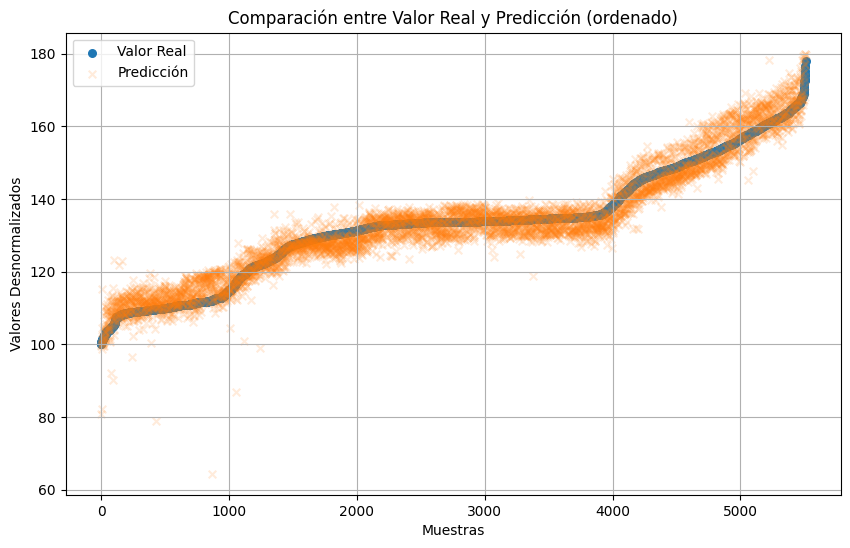

In [20]:
# Cargamos el mejor modelo Adaline
with open("mejor_modelo_Adaline.pkl", "rb") as modelo_file:
    mejor_modelo_adaline = pickle.load(modelo_file)

# Predecimos los datos de test
prediccion = mejor_modelo_adaline.predict(X_test)

# Obtenemos el MSE
mse_test = mean_squared_error(prediccion, y_test)
print(f"MSE de test Adaline: {mse_test}")

# Desnormalizamos las predicciones y las salidas deseadas
prediccion_desnormalizada = prediccion * (y_max - y_min) + y_min
y_test_desnormalizada = y_test * (y_max - y_min) + y_min

# Creamos un DataFrame con las predicciones y los valores reales
data_to_save = pd.DataFrame({'Prediccion': prediccion_desnormalizada.flatten(), 'Valor Real': y_test_desnormalizada})

# Ordenar los valores reales de menor a mayor
sorted_data = data_to_save.sort_values(by='Valor Real')

# Guardamos el DataFrame en un archivo CSV
sorted_data.to_csv('predicciones_y_deseados_Adaline.csv', index=False)

# Convertir las columnas en listas de números
predicciones = sorted_data['Prediccion'].tolist()
valores_reales = sorted_data['Valor Real'].tolist()

# Creamos la gráfica
plt.figure(figsize=(10, 6))
plt.scatter(range(len(valores_reales)), valores_reales, label='Valor Real', marker='o', s=30, alpha=1)
plt.scatter(range(len(predicciones)), predicciones, label='Predicción', marker='x', s=30, alpha=0.15)
plt.xlabel('Muestras')
plt.ylabel('Valores Desnormalizados')
plt.title('Comparación entre Valor Real y Predicción (ordenado)')
plt.legend()
plt.grid(True)

# Mostramos la gráfica
plt.show()


## 9. Perceptrón multicapa

### 9.2 Perceptrón multicapa con función de activación RELU

Definimos la función que crea el modelo.

In [13]:
input_shape=(X_train.shape [1],) # utilizamos los datos de entrenamiento para definir la tupla , en este caso sera (21,)
# Definimos la función para crear el modelo
def create_PM_relu(num_hidden_neurons=50):
    #1 capa oculta con relu y 1 neurona de salida con sigmoide
    model = Sequential()
    model.add(Dense(num_hidden_neurons, input_shape=input_shape, activation='relu'))
    model.add(Dense(1, activation='sigmoid'))
    return model

Construimos distintos modelos con diferentes hiperparámetros para evaluarlos con los datos de validación y poder escoger el mejor.

Epoch 1/10
804/804 [==============================] - 5s 5ms/step - loss: 0.0032 - mse: 0.0032 - val_loss: 6.6929e-04 - val_mse: 6.6929e-04
Epoch 2/10
804/804 [==============================] - 5s 7ms/step - loss: 4.8524e-04 - mse: 4.8524e-04 - val_loss: 6.4443e-04 - val_mse: 6.4443e-04
Epoch 3/10
804/804 [==============================] - 2s 3ms/step - loss: 4.2501e-04 - mse: 4.2501e-04 - val_loss: 6.7285e-04 - val_mse: 6.7285e-04
Epoch 4/10
804/804 [==============================] - 2s 2ms/step - loss: 4.0823e-04 - mse: 4.0823e-04 - val_loss: 6.7303e-04 - val_mse: 6.7303e-04
Epoch 5/10
804/804 [==============================] - 2s 2ms/step - loss: 3.9847e-04 - mse: 3.9847e-04 - val_loss: 6.6672e-04 - val_mse: 6.6672e-04
Epoch 6/10
804/804 [==============================] - 2s 2ms/step - loss: 3.9133e-04 - mse: 3.9133e-04 - val_loss: 6.6285e-04 - val_mse: 6.6285e-04
Epoch 7/10
804/804 [==============================] - 2s 2ms/step - loss: 3.8546e-04 - mse: 3.8546e-04 - val_loss: 6.584

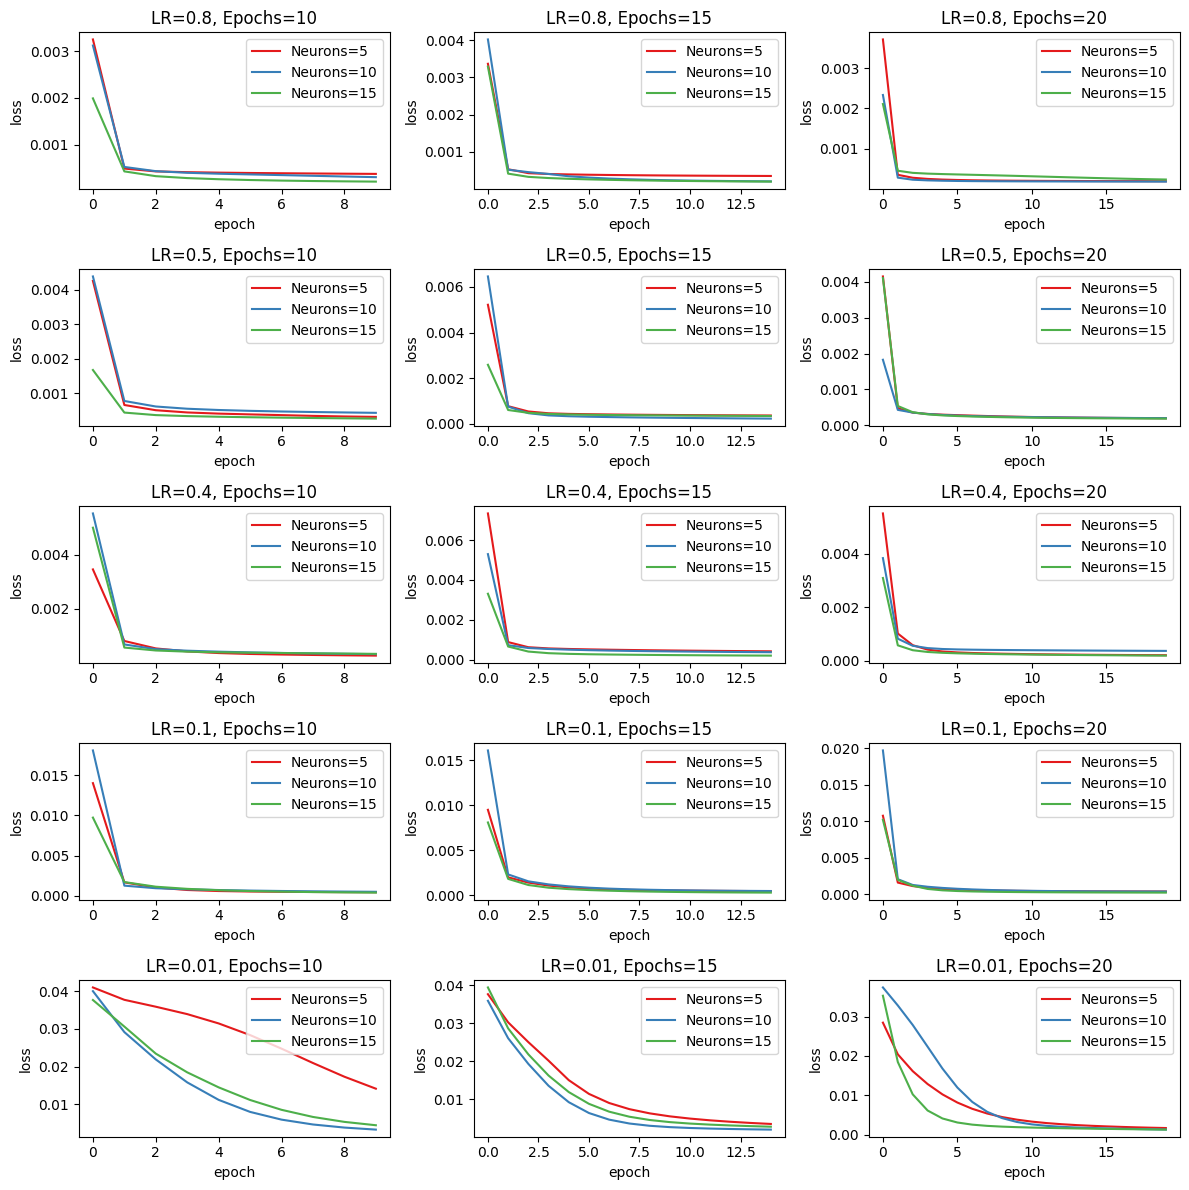

In [14]:
# Definimos una lista de valores para learning rates, número de neuronas ocultas y épocas
learning_rates = [0.8, 0.5, 0.4,0.1,0.01]
hidden_neurons = [5, 10, 15]
epochs_list = [10, 15, 20]
batch_size = 32

# Configuramos el diseño de la figura
fig, axes = plt.subplots(len(learning_rates), len(epochs_list), figsize=(12, 12))

# Iteramos sobre las tasas de aprendizaje
for i, lr in enumerate(learning_rates):
    for k, epochs in enumerate(epochs_list):
        # Creamos una paleta de colores
        palette = sns.color_palette("Set1", len(hidden_neurons))

        # Configuramos la figura para esta tasa de aprendizaje y número de épocas
        ax = axes[i, k]

        for j, num_neurons in enumerate(hidden_neurons):
            model_relu = create_PM_relu(num_neurons)

            # CONFIGURAR MODELO Y ENTRENAMIENTO
            model_relu.compile(loss='mean_squared_error', optimizer=tf.keras.optimizers.SGD(learning_rate=lr, momentum=0), metrics=['mse'])
            start_time = time.time()
            historico = model_relu.fit(X_train, y_train, epochs=epochs, batch_size=batch_size, verbose=1, validation_data=(X_validation, y_validation), shuffle=False, validation_freq=1)
            tiempo_total = time.time() - start_time
            print(f"Tiempo de entrenamiento para (lr = {lr}, epoch = {epochs}): {tiempo_total}s \n")
            # Obtenemos las predicciones
            prediccion_PM = model_sigmoid.predict(X_test)
            # Obtenemos el MSE de test
            mse_test_sigmoid = mean_squared_error(y_test, prediccion_PM)
            print(f"MSE de test (lr = {lr}, epoch = {epochs}, num_neurons = {num_neurons}): {mse_test_sigmoid:.2e} \n")
             # Agregamos la gráfica a su subplot correspondiente
            ax.plot(historico.history['loss'], label=f'Neurons={num_neurons}', color=palette[j])
            ax.plot(historico.history['val_loss'], label=f'Neurons={num_neurons} (Validation)', linestyle='--', color=palette[j])
            ax.set_title(f'LR={lr}, Epochs={epochs}')
            ax.set_ylabel('loss')
            ax.set_xlabel('epoch')
            ax.legend()

# Ajustamos espaciado y mostrar la figura
plt.tight_layout()
plt.show()


### 9.3 Perceptrón multicapa con función de activación sigmoide

Definimos la función para crear el modelo

In [22]:
input_shape=(X_train.shape [1],) # utilizamos los datos de entrenamiento para definir la tupla

def create_PM_sigmoid(num_hidden_neurons = 50):#se pone un valor por defecto a num_hidden_neurons, pero puede llamarse con otro valor
  #1 capa oculta y 1 neurona de salida con sigmoide
  model = Sequential() # generamos el modelo dandole una forma secuencial:
  model.add(Dense(num_hidden_neurons, input_shape=input_shape, activation='sigmoid')) # capa con x=num_hidden_neurons neuronas activadas con sigmoide
  model.add(Dense(1,activation='sigmoid')) # capa con x=1 neurona (solo una neurona de salida) activada con sigmoide
  return model

Construimos distintos modelos con diferentes hiperparámetros para evaluarlos con los datos de validación y poder escoger el mejor.

Epoch 1/10
804/804 [==============================] - 3s 3ms/step - loss: 0.0098 - mse: 0.0098 - val_loss: 0.0013 - val_mse: 0.0013
Epoch 2/10
804/804 [==============================] - 2s 3ms/step - loss: 9.1198e-04 - mse: 9.1198e-04 - val_loss: 6.9099e-04 - val_mse: 6.9099e-04
Epoch 3/10
804/804 [==============================] - 2s 2ms/step - loss: 5.7701e-04 - mse: 5.7701e-04 - val_loss: 5.3818e-04 - val_mse: 5.3818e-04
Epoch 4/10
804/804 [==============================] - 2s 3ms/step - loss: 4.6358e-04 - mse: 4.6358e-04 - val_loss: 4.7140e-04 - val_mse: 4.7140e-04
Epoch 5/10
804/804 [==============================] - 2s 2ms/step - loss: 4.0978e-04 - mse: 4.0978e-04 - val_loss: 4.3617e-04 - val_mse: 4.3617e-04
Epoch 6/10
804/804 [==============================] - 2s 2ms/step - loss: 3.8071e-04 - mse: 3.8071e-04 - val_loss: 4.1552e-04 - val_mse: 4.1552e-04
Epoch 7/10
804/804 [==============================] - 2s 2ms/step - loss: 3.6353e-04 - mse: 3.6353e-04 - val_loss: 4.0216e-04 - 

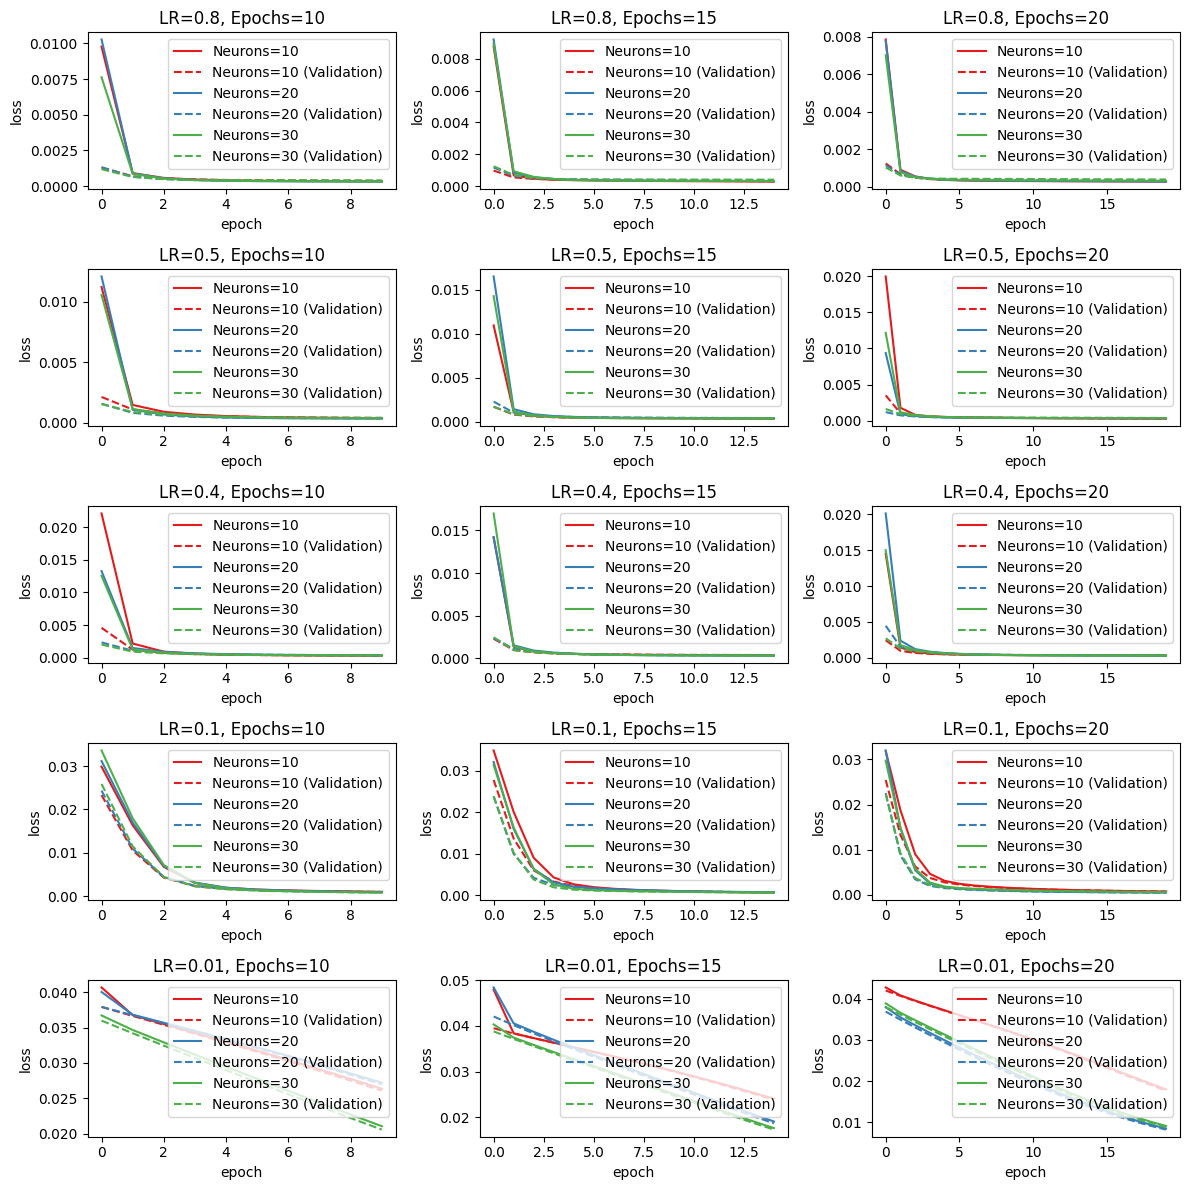

In [23]:
# Definir una lista de valores para learning rates, número de neuronas ocultas y épocas
learning_rates = [0.8, 0.5, 0.4, 0.1, 0.01]
hidden_neurons = [10, 20, 30]
epochs_list = [10, 15, 20]
batch_size = 32


# Configurar el diseño de la figura
fig, axes = plt.subplots(len(learning_rates), len(epochs_list), figsize=(12, 12))

# Iterar sobre las tasas de aprendizaje
for i, lr in enumerate(learning_rates):
    for k, epochs in enumerate(epochs_list):
        # Crear una paleta de colores
        palette = sns.color_palette("Set1", len(hidden_neurons))

        # Configurar la figura para esta tasa de aprendizaje y número de épocas
        ax = axes[i, k]

        for j, num_neurons in enumerate(hidden_neurons):
            model_sigmoid = create_PM_sigmoid(num_neurons)

            # CONFIGURAR MODELO Y ENTRENAMIENTO
            model_sigmoid.compile(loss='mean_squared_error', optimizer=tf.keras.optimizers.SGD(learning_rate=lr, momentum=0), metrics=['mse'])
            start_time = time.time()
            historico = model_sigmoid.fit(X_train, y_train, epochs=epochs, batch_size=batch_size, verbose=1, validation_data=(X_validation, y_validation), shuffle=False, validation_freq=1)
            tiempo_total = time.time() - start_time
            print(f"Tiempo de entrenamiento para (lr = {lr}, epoch = {epochs}, num_neurons = {num_neurons}): {tiempo_total}s")
            # Obtenemos las predicciones
            prediccion_PM = model_sigmoid.predict(X_test)
            # Obtenemos el MSE de test
            mse_test_sigmoid = mean_squared_error(y_test, prediccion_PM)
            print(f"MSE de test (lr = {lr}, epoch = {epochs}, num_neurons = {num_neurons}): {mse_test_sigmoid:.2e} \n")
            # Agregar la gráfica a su subplot correspondiente
            ax.plot(historico.history['loss'], label=f'Neurons={num_neurons}', color=palette[j])
            ax.plot(historico.history['val_loss'], label=f'Neurons={num_neurons} (Validation)', linestyle='--', color=palette[j])
            ax.set_title(f'LR={lr}, Epochs={epochs}')
            ax.set_ylabel('loss')
            ax.set_xlabel('epoch')
            ax.legend()

# Ajustar espaciado y mostrar la figura
plt.tight_layout()
plt.show()



### 9.4 Elección y guardado del mejor modelo
Observando los resultados, el mejor modelo es el que se construye utilizando la función de activación RELU con un learning_rate de 0.5, 20 épocas y 20 neuronas ocultas ya que es el que obtiene un MSE de validación más bajo (1.91 e-04). Por tanto, creamos y entrenamos de nuevo un modelo con estos hiperparámetros y lo guardamos.

También guardamos su error de entrenamiento y de validación.

In [24]:
mejor_modelo = create_PM_relu(20)
# CONFIGURAR MODELO Y ENTRENAMIENTO
lr = 0.5 # razon de aprendizaje
epochs = 20 # numero de ciclos que se quiere realizar en el entrenamiento
batch_size=32
mejor_modelo.compile(loss='mean_squared_error', optimizer=tf.keras.optimizers.SGD(learning_rate=lr, momentum=0), metrics=['mse'] )
historico = mejor_modelo.fit(X_train, y_train, epochs=20, batch_size=32, verbose=1, validation_data=(X_validation,y_validation),
shuffle=False, validation_freq=1)

# Obtenemos los errores de validación y entrenamiento del historial
historial_entrenamiento = historico.history['loss']
historial_validacion = historico.history['val_loss']

# Guardamos los errores de validación y entrenamiento en un archivo CSV
errores_df = pd.DataFrame({'Entrenamiento': historial_entrenamiento, 'Validacion': historial_validacion})
errores_df.to_csv('errores_PM.csv', index=False)

# Guardamos el modelo completo
mejor_modelo.save('mejor_modelo_PM.keras')

Epoch 1/20
804/804 [==============================] - 2s 2ms/step - loss: 0.0025 - mse: 0.0025 - val_loss: 5.5345e-04 - val_mse: 5.5345e-04
Epoch 2/20
804/804 [==============================] - 2s 2ms/step - loss: 4.0119e-04 - mse: 4.0119e-04 - val_loss: 3.9320e-04 - val_mse: 3.9320e-04
Epoch 3/20
804/804 [==============================] - 2s 2ms/step - loss: 3.1816e-04 - mse: 3.1816e-04 - val_loss: 3.4934e-04 - val_mse: 3.4934e-04
Epoch 4/20
804/804 [==============================] - 2s 2ms/step - loss: 2.8869e-04 - mse: 2.8869e-04 - val_loss: 3.2403e-04 - val_mse: 3.2403e-04
Epoch 5/20
804/804 [==============================] - 2s 2ms/step - loss: 2.6960e-04 - mse: 2.6960e-04 - val_loss: 3.0154e-04 - val_mse: 3.0154e-04
Epoch 6/20
804/804 [==============================] - 2s 3ms/step - loss: 2.5529e-04 - mse: 2.5529e-04 - val_loss: 2.8504e-04 - val_mse: 2.8504e-04
Epoch 7/20
804/804 [==============================] - 2s 2ms/step - loss: 2.4405e-04 - mse: 2.4405e-04 - val_loss: 2.708

### 9.6 Error de test y predicciones

Obtenemos el mejor modelo que hemos guardado anteriormente

In [25]:
# Obtenemos el mejor modelo
mejor_modelo_PM = load_model('mejor_modelo_PM.keras')

Evaluamos el mejor modelo con los datos de test

In [26]:
# Predecimos sobre los datos de test
prediccion_PM = mejor_modelo_PM.predict(X_test)
# Obtenemos el MSE de test
mse_PM = mean_squared_error(y_test, prediccion_PM)
print(f'Error de test: {mse_PM:.2e}')

173/173 [==============================] - 0s 2ms/step
Error de test: 2.05e-04


Desnormalizamos las predicciones y las comparamos con los valores deseados.

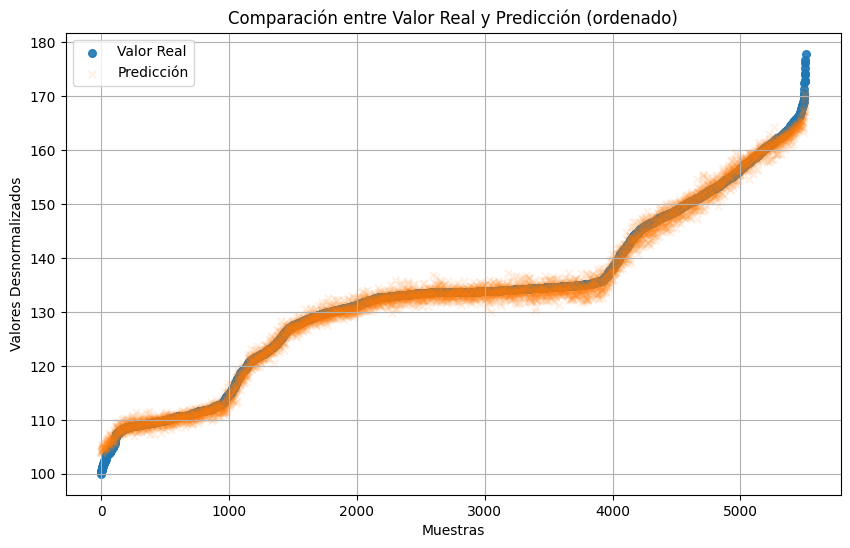

In [27]:
# Desnormalizamos las predicciones y los valores deseados
prediccion_desnormalizada_PM = prediccion_PM * (y_max - y_min) + y_min
y_test_desnormalizada = y_test * (y_max - y_min) + y_min

# Convertimos en lista
prediccion_desnormalizada_PM = prediccion_desnormalizada_PM.tolist()
y_test_desnormalizada = y_test_desnormalizada.tolist()

# Creamos un DataFrame con las predicciones y los valores reales
data_to_save_PM = pd.DataFrame({'Prediccion': np.array(prediccion_desnormalizada_PM).flatten(), 'Valor Real': y_test_desnormalizada})

# Ordenamos los valores reales de menor a mayor
sorted_data_PM = data_to_save_PM.sort_values(by='Valor Real')

sorted_data_PM.to_csv('predicciones_y_deseados_PM.csv', index=False)

# Convertimos las columnas en listas de números
predicciones_PM = sorted_data_PM['Prediccion'].tolist()
valores_reales = sorted_data_PM['Valor Real'].tolist()

# Creamos la gráfica
plt.figure(figsize=(10, 6))
plt.scatter(range(len(valores_reales)), valores_reales, label='Valor Real', marker='o', s=30, alpha=0.9)
plt.scatter(range(len(predicciones_PM)), predicciones_PM, label='Predicción', marker='x', s=30, alpha=0.1)
plt.xlabel('Muestras')
plt.ylabel('Valores Desnormalizados')
plt.title('Comparación entre Valor Real y Predicción (ordenado)')
plt.legend()
plt.grid(True)

# Mostramos la gráfica
plt.show()